In [1]:
import pymc as pm

import matplotlib
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
lambda_ = pm.Exponential("poisson_param", 1)
# used in the call to the next variable...
data_generator = pm.Poisson("data_generator", lambda_)
data_plus_one = data_generator + 1

In [2]:
print ("Children of ‘lambda_’: ")
print (lambda_.children)
print ("\nParents of ‘data_generator’: ")
print (data_generator.parents)
print ("\nChildren of ‘data_generator’: ")
print (data_generator.children)

Children of ‘lambda_’: 
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x00000263BB3695F8>}

Parents of ‘data_generator’: 
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x00000263BD4E72E8>}

Children of ‘data_generator’: 
{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x00000263BB386208>}


In [3]:
print ("lambda_.value =", lambda_.value)
print ("data_generator.value =", data_generator.value)
print ("data_plus_one.value =", data_plus_one.value)

lambda_.value = 4.513525670414104
data_generator.value = 4
data_plus_one.value = 5


In [4]:
lambda_1 = pm.Exponential("lambda_1", 1)  # prior on first behaviour
lambda_2 = pm.Exponential("lambda_2", 1)  # prior on second behaviour
tau = pm.DiscreteUniform("tau", lower=0, upper=10)  # prior on behaviour change
print ("Initialized values...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value, "\n")

lambda_1.random(), lambda_2.random(), tau.random()

print("After calling random() on the variables...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value)

Initialized values...
lambda_1.value = 1.662
lambda_2.value = 0.008
tau.value = 5.000 

After calling random() on the variables...
lambda_1.value = 2.470
lambda_2.value = 0.759
tau.value = 0.000


In [5]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

In [6]:
import numpy as np
n_data_points = 5  # in CH1 we had ~70 data points


@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after tau is lambda2
    return out

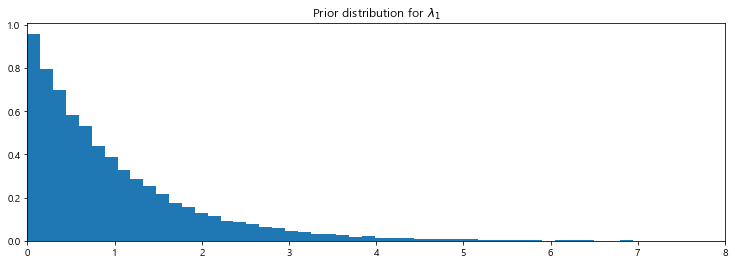

In [7]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)


samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [8]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")
fixed_variable.random()
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [9]:
# We're using some fake data here
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


In [10]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

In [11]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

53


In [12]:
alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

27.3235304476 8.46730003704


In [13]:
lambda_ = np.r_[ lambda_1*np.ones(tau), lambda_2*np.ones(80-tau) ]
print (lambda_)

[ 27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045  27.32353045  27.32353045
  27.32353045  27.32353045  27.32353045   8.46730004   8.46730004
   8.46730004   8.46730004   8.46730004   8.46730004   8.46730004
   8.46730004   8.46730004   8.46730004   8.46730004   8.46730004
   8.46730004   8.46730004   8.46730004   8.46730004   8.46730004
   8.46730004   8.46730004   8.46730004   8.46730004   8.46730004
   8.46730

In [14]:
data = pm.rpoisson(lambda_)
print (data)

[29 39 24 20 21 24 25 35 35 26 15 22 35 36 36 35 21 28 30 28 27 26 24 32 22
 22 34 25 29 24 29 20 21 26 22 19 29 28 31 27 35 23 25 27 34 26 28 19 23 27
 35 24 30  9  7  6 11 10 10 11  9 11 11 10  6 11  8  8  8 10  7 13  8  5  6
  6  9  9  8  9]


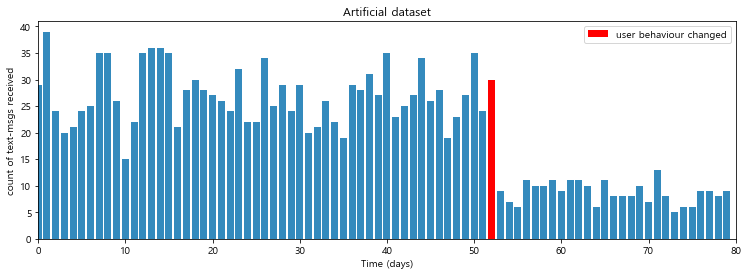

In [15]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();

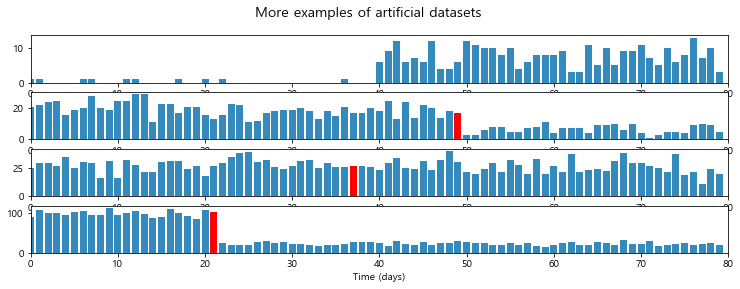

In [16]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
    plt.xlim(0, 80)
    plt.xlabel("Time (days)")
plt.ylabel("Text messages received")
figsize(12.5, 5)
plt.suptitle("More examples of artificial datasets", fontsize=14)
for i in range(1, 5):
    plt.subplot(4, 1, i)
    plot_artificial_sms_dataset()

In [17]:
import pymc as pm

# The parameters are the bounds of the Uniform.
p = pm.Uniform('p', lower=0, upper=1)

In [18]:
# set constants
p_true = 0.05  # remember, this is unknown.
N = 1500

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
occurrences = pm.rbernoulli(p_true, N)

print(occurrences)  # Remember: Python treats True == 1, and False == 0
print(occurrences.sum())

[False False False ..., False False False]
64


In [19]:
# Occurrences.mean is equal to n/N.
print("What is the observed frequency in Group A? %.4f" % occurrences.mean())
print("Does this equal the true frequency? %s" % (occurrences.mean() == p_true))

What is the observed frequency in Group A? 0.0427
Does this equal the true frequency? False


In [20]:
# include the observations, which are Bernoulli
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

# To be explained in chapter 3
mcmc = pm.MCMC([p, obs])
mcmc.sample(18000, 1000)

 [-----------------100%-----------------] 18000 of 18000 complete in 1.0 sec

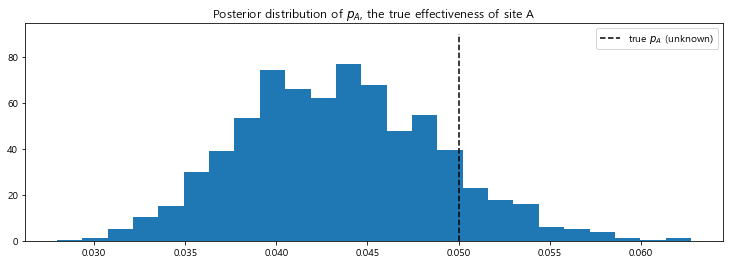

In [21]:
figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(mcmc.trace("p")[:], bins=25, histtype="stepfilled", normed=True)
plt.legend();

In [22]:
import pymc as pm
figsize(12, 4)

# these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

# notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

# generate some observations
observations_A = pm.rbernoulli(true_p_A, N_A)
observations_B = pm.rbernoulli(true_p_B, N_B)
print("Obs from Site A: ", observations_A[:30].astype(int), "...")
print("Obs from Site B: ", observations_B[:30].astype(int), "...")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


In [23]:
print(observations_A.mean())
print(observations_B.mean())

0.0566666666667
0.044


In [24]:
# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)


# Define the deterministic delta function. This is our unknown of interest.
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

# Set of observations, in this case we have two observation datasets.
obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

# To be explained in chapter 3.
mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.9 sec

In [25]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

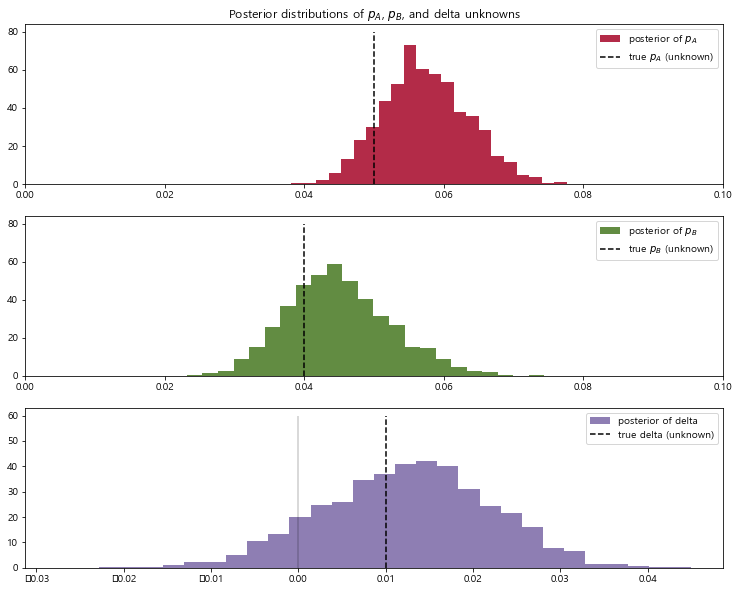

In [26]:
figsize(12.5, 10)

# histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

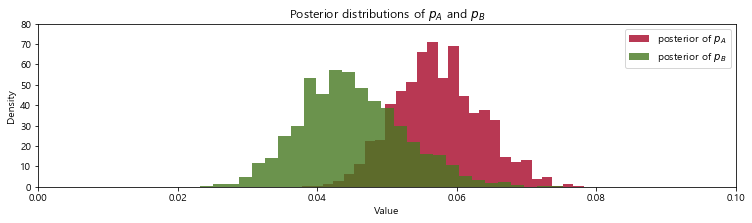

In [27]:
figsize(12.5, 3)
# histogram of posteriors
plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.80,
label="posterior of $p_A$", color="#A60628", normed=True)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.80,
label="posterior of $p_B$", color="#467821", normed=True)
plt.legend(loc="upper right")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Posterior distributions of $p_A$ and $p_B$")
plt.ylim(0,80);

In [28]:
# Count the number of samples less than 0, i.e. the area under the curve
# before 0, represent the probability that site A is worse than site B.
print("Probability site A is WORSE than site B: %.3f" % \
    (delta_samples < 0).mean())

print("Probability site A is BETTER than site B: %.3f" % \
    (delta_samples > 0).mean())

Probability site A is WORSE than site B: 0.103
Probability site A is BETTER than site B: 0.897


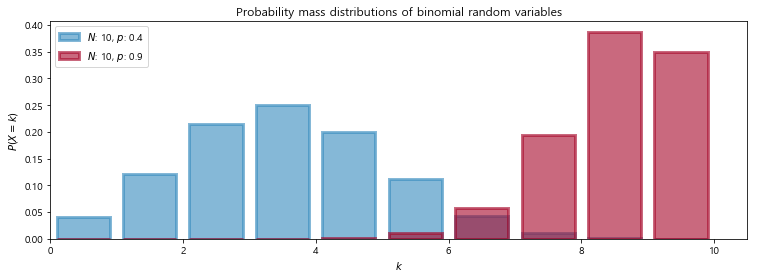

In [29]:
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

In [30]:
import pymc as pm

N = 100
p = pm.Uniform("freq_cheating", 0, 1)

In [31]:
true_answers = pm.Bernoulli("truths", p, size=N)

In [32]:
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
print(first_coin_flips.value)

[ True  True  True  True  True False  True False  True False  True False
  True  True False  True  True False  True  True False False  True  True
  True False False False  True False False False  True  True False False
  True  True  True False False False False False False  True False  True
 False  True False  True  True  True False False  True False  True False
 False False  True  True  True  True  True  True False  True False False
 False False False  True False False False False  True False  True  True
  True False False False  True False False False False  True False False
  True  True  True False]


In [33]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

In [34]:
@pm.deterministic
def observed_proportion(t_a=true_answers,
                        fc=first_coin_flips,
                        sc=second_coin_flips):

    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(N)

In [35]:
observed_proportion.value

0.70999999999999996

In [36]:
X = 35

observations = pm.Binomial("obs", N, observed_proportion, observed=True,
                           value=X)

In [37]:
model = pm.Model([p, true_answers, first_coin_flips,
                  second_coin_flips, observed_proportion, observations])

# To be explained in Chapter 3!
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 10.7 sec

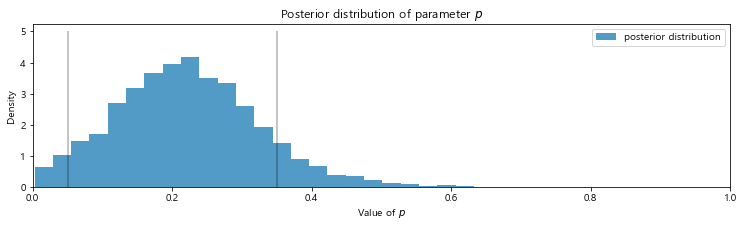

In [38]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)
plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend();

In [39]:
p = pm.Uniform("freq_cheating", 0, 1)


@pm.deterministic
def p_skewed(p=p):
    return 0.5 * p + 0.25

In [40]:
yes_responses = pm.Binomial("number_cheaters", 100, p_skewed,
                            value=35, observed=True)

In [41]:
model = pm.Model([yes_responses, p_skewed, p])

# To Be Explained in Chapter 3!
mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)

 [-----------------100%-----------------] 25000 of 25000 complete in 1.1 sec

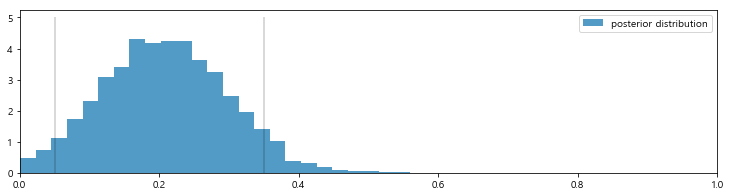

In [42]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.2)
plt.xlim(0, 1)
plt.legend();

In [43]:
N = 10
x = np.empty(N, dtype=object)
for i in range(0, N):
    x[i] = pm.Exponential('x_%i' % i, (i + 1) ** 2)

Temp (F), O-Ring failure?
[[ 66.   0.]
 [ 70.   1.]
 [ 69.   0.]
 [ 68.   0.]
 [ 67.   0.]
 [ 72.   0.]
 [ 73.   0.]
 [ 70.   0.]
 [ 57.   1.]
 [ 63.   1.]
 [ 70.   1.]
 [ 78.   0.]
 [ 67.   0.]
 [ 53.   1.]
 [ 67.   0.]
 [ 75.   0.]
 [ 70.   0.]
 [ 81.   0.]
 [ 76.   0.]
 [ 79.   0.]
 [ 75.   1.]
 [ 76.   0.]
 [ 58.   1.]]


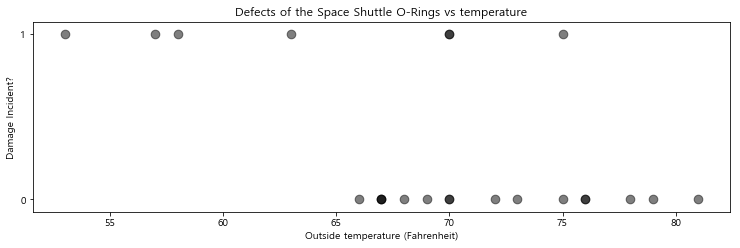

In [44]:
figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)
challenger_data = np.genfromtxt(r"C:\Users\wh\006775\Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master\Chapter2_MorePyMC\data\challenger_data.csv", skip_header=1,
                                usecols=[1, 2], missing_values="NA",
                                delimiter=",")
# drop the NA values
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]

# plot it, as a function of temperature (the first column)
print("Temp (F), O-Ring failure?")
print(challenger_data)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k",
            alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside temperature (Fahrenheit)")
plt.title("Defects of the Space Shuttle O-Rings vs temperature");

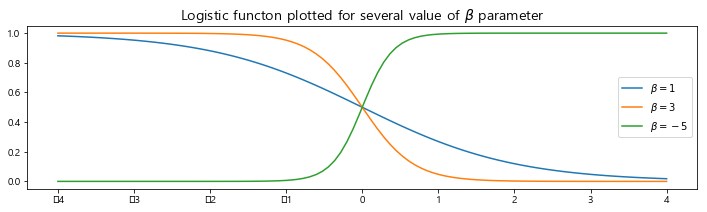

In [45]:
figsize(12, 3)


def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

x = np.linspace(-4, 4, 100)
plt.plot(x, logistic(x, 1), label=r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$")
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$")
plt.title("Logistic functon plotted for several value of $\\beta$ parameter", fontsize=14)
plt.legend();

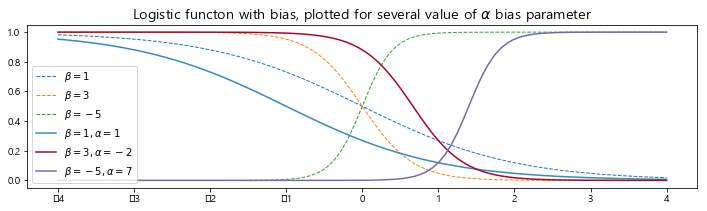

In [46]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw=1)
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw=1)
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$", ls="--", lw=1)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha = 1$",
         color="#348ABD")
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha = -2$",
         color="#A60628")
plt.plot(x, logistic(x, -5, 7), label=r"$\beta = -5, \alpha = 7$",
         color="#7A68A6")

plt.title("Logistic functon with bias, plotted for several value of $\\alpha$ bias parameter", fontsize=14)
plt.legend(loc="lower left");

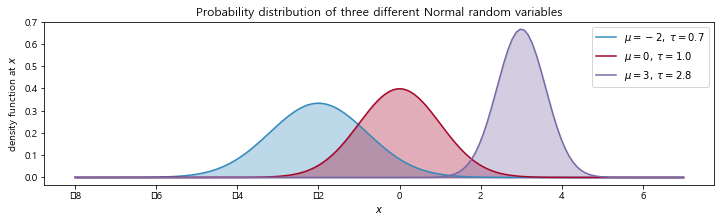

In [47]:
import scipy.stats as stats

nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, tau, colors)

for _mu, _tau, _color in parameters:
    plt.plot(x, nor.pdf(x, _mu, scale=1. / np.sqrt(_tau)),
             label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1. / np.sqrt(_tau)), color=_color,
                     alpha=.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title("Probability distribution of three different Normal random \
variables");

In [48]:
import pymc as pm

temperature = challenger_data[:, 0]
D = challenger_data[:, 1]  # defect or not?

# notice the`value` here. We explain why below.
beta = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)


@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta):
    return 1.0 / (1. + np.exp(beta * t + alpha))

In [49]:
p.value

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [50]:
# connect the probabilities in `p` with our observations through a
# Bernoulli random variable.
observed = pm.Bernoulli("bernoulli_obs", p, value=D, observed=True)

model = pm.Model([observed, beta, alpha])

# Mysterious code to be explained in Chapter 3
map_ = pm.MAP(model)
map_.fit()
mcmc = pm.MCMC(model)
mcmc.sample(120000, 100000, 2)

 [-----------------100%-----------------] 120000 of 120000 complete in 9.3 sec

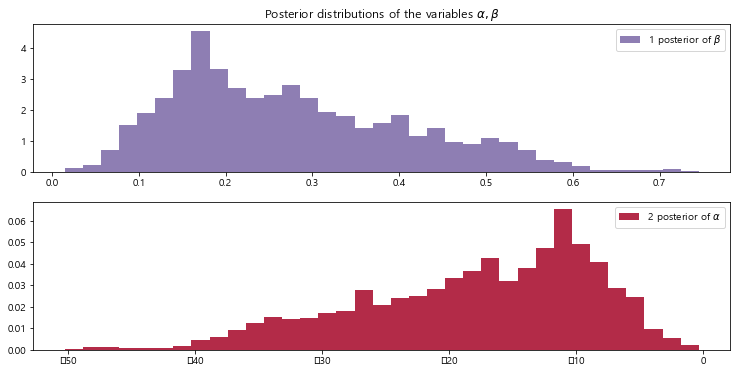

In [51]:
alpha_samples = mcmc.trace('alpha')[:, None]  # best to make them 1d
beta_samples = mcmc.trace('beta')[:, None]

figsize(12.5, 6)

# histogram of the samples:
plt.subplot(211)
plt.title(r"Posterior distributions of the variables $\alpha, \beta$")
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"1 posterior of $\beta$", color="#7A68A6", normed=True)
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"2 posterior of $\alpha$", color="#A60628", normed=True)
plt.legend();

In [52]:
t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)

mean_prob_t = p_t.mean(axis=0)

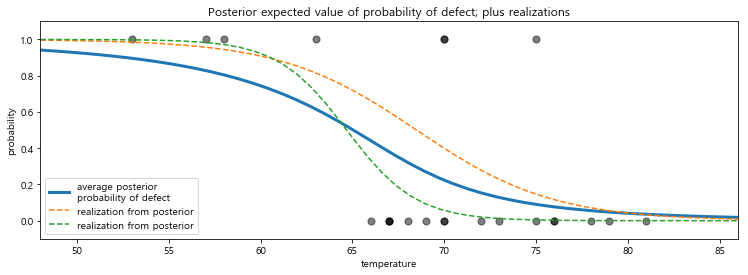

In [53]:
figsize(12.5, 4)

plt.plot(t, mean_prob_t, lw=3, label="average posterior \nprobability \
of defect")
plt.plot(t, p_t[0, :], ls="--", label="realization from posterior")
plt.plot(t, p_t[-2, :], ls="--", label="realization from posterior")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.title("Posterior expected value of probability of defect; \
plus realizations")
plt.legend(loc="lower left")
plt.ylim(-0.1, 1.1)
plt.xlim(t.min(), t.max())
plt.ylabel("probability")
plt.xlabel("temperature");

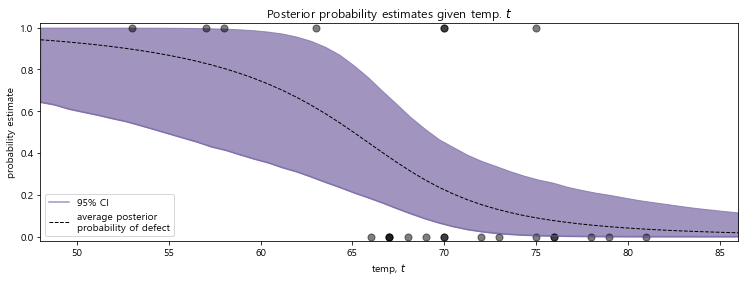

In [54]:
from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");

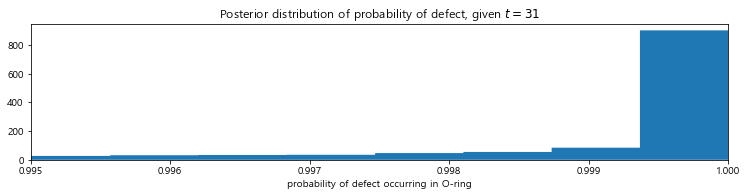

In [55]:
figsize(12.5, 2.5)

prob_31 = logistic(31, beta_samples, alpha_samples)

plt.xlim(0.995, 1)
plt.hist(prob_31, bins=1000, normed=True, histtype='stepfilled')
plt.title("Posterior distribution of probability of defect, given $t = 31$")
plt.xlabel("probability of defect occurring in O-ring");

In [56]:
simulated = pm.Bernoulli("bernoulli_sim", p)
N = 10000

mcmc = pm.MCMC([simulated, alpha, beta, observed])
mcmc.sample(N)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.5 sec

(10000, 23)


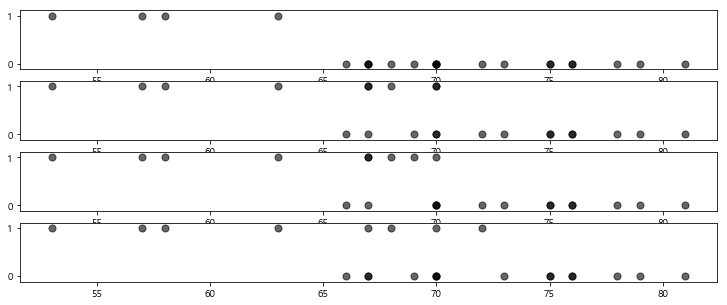

In [57]:
figsize(12.5, 5)

simulations = mcmc.trace("bernoulli_sim")[:]
print(simulations.shape)

plt.title("Simulated dataset using posterior parameters")
figsize(12.5, 6)
for i in range(4):
    ax = plt.subplot(4, 1, i + 1)
    plt.scatter(temperature, simulations[1000 * i, :], color="k",
                s=50, alpha=0.6)

In [58]:
posterior_probability = simulations.mean(axis=0)
print("Obs. | Array of Simulated Defects\
| Posterior Probability of Defect | Realized Defect ")
for i in range(len(D)):
    print ("%s | %s | %.2f | %d" %\
(str(i).zfill(2),str(simulations[:10,i])[:-1] + "...]".ljust(12),
posterior_probability[i], D[i]))

Obs. | Array of Simulated Defects| Posterior Probability of Defect | Realized Defect 
00 | [False False False False False  True False False  True False...]         | 0.51 | 0
01 | [False False  True False False False False False False False...]         | 0.18 | 1
02 | [False False False False False False False False False False...]         | 0.25 | 0
03 | [False False False False False False False False  True False...]         | 0.33 | 0
04 | [False False  True False False False False False  True False...]         | 0.41 | 0
05 | [False False  True False False False False False False False...]         | 0.09 | 0
06 | [False False False False False False False False False False...]         | 0.06 | 0
07 | [False False False False False False False False False False...]         | 0.18 | 0
08 | [ True  True  True  True  True  True  True  True  True  True...]         | 0.96 | 1
09 | [ True False False  True  True False  True  True  True  True...]         | 0.76 | 1
10 | [False False False 

In [59]:
ix = np.argsort(posterior_probability)
print("probb | defect ")
for i in range(len(D)):
    print("%.2f  |   %d" % (posterior_probability[ix[i]], D[ix[i]]))

probb | defect 
0.01  |   0
0.01  |   0
0.01  |   0
0.02  |   0
0.03  |   0
0.03  |   0
0.03  |   1
0.06  |   0
0.09  |   0
0.18  |   1
0.18  |   0
0.18  |   1
0.19  |   0
0.25  |   0
0.33  |   0
0.41  |   0
0.41  |   0
0.42  |   0
0.51  |   0
0.76  |   1
0.95  |   1
0.96  |   1
0.99  |   1


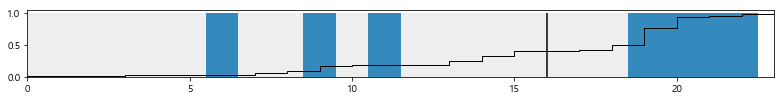

In [60]:
import separation_plot
from separation_plot import separation_plot


figsize(11., 1.5)
separation_plot(posterior_probability, D)

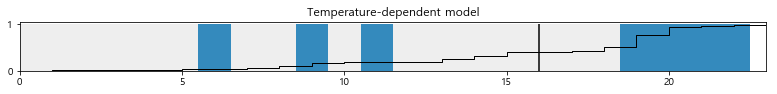

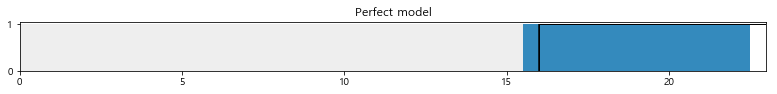

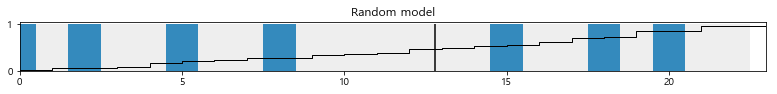

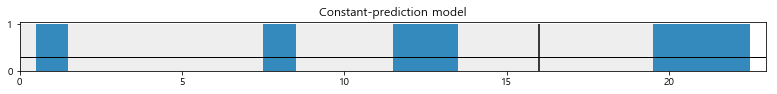

In [61]:
figsize(11., 1.25)

# Our temperature-dependent model
separation_plot(posterior_probability, D)
plt.title("Temperature-dependent model")

# Perfect model
# i.e. the probability of defect is equal to if a defect occurred or not.
p = D
separation_plot(p, D)
plt.title("Perfect model")

# random predictions
p = np.random.rand(23)
separation_plot(p, D)
plt.title("Random model")

# constant model
constant_prob = 7. / 23 * np.ones(23)
separation_plot(constant_prob, D)
plt.title("Constant-prediction model");

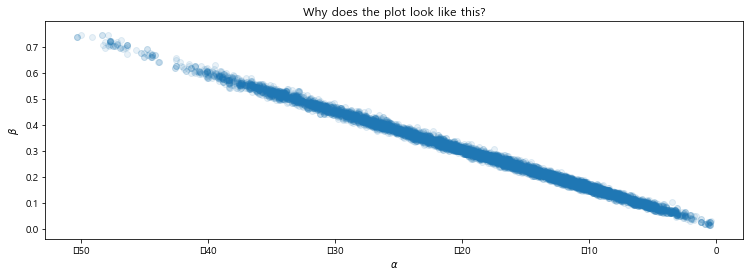

In [62]:
# type your code here.
figsize(12.5, 4)

plt.scatter(alpha_samples, beta_samples, alpha=0.1)
plt.title("Why does the plot look like this?")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$");